# Linear Regression

## The Normal Equation
* ![NormalEquation](./etc/NormalEquation.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# y = 4 + 3x + (noise)

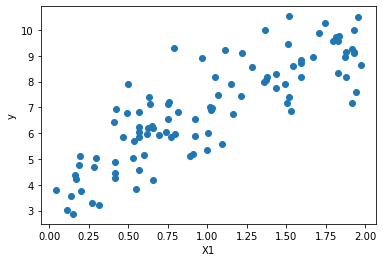

In [3]:
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X1')
plt.show()

Let's compute the θ'hat using Normal Equation.

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
# y = 4 + 3x + (noise)

array([[4.04749785],
       [2.85348396]])

In [5]:
# now we can make predictions with this theta_best

X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new] # x0 = 1 added for bias
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04749785],
       [9.75446578]])

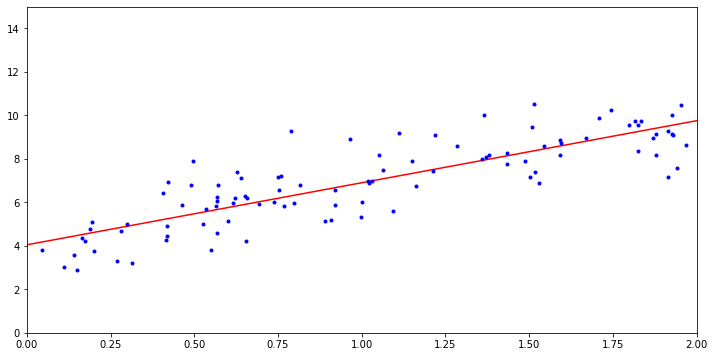

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# With scikit-learn its quite simple
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04749785]), array([[2.85348396]]))

In [9]:
lin_reg.predict(X_new)

array([[4.04749785],
       [9.75446578]])

## Gradient Descent Algorithm

In [10]:
import numpy as np

### Batch Gradient Descent Algorithm

In [11]:
eta = 0.1 # learning rate
n_itreations = 1000
m = 100

theta = np.random.randn(2, 1) # random init

for iteration in range(n_itreations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.04749785],
       [2.85348396]])

### Stochastic Gradient Descent

* The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration.
* On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure 4-9). So once the algo‐
rithm stops, the final parameter values are good, but not optimal.
* When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
*  One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum


In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta


array([[4.09120825],
       [2.76942773]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97752081]), array([2.76728948]))

![DifferentAlgorithms](etc/differentAlgorithms.jpg)

# Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

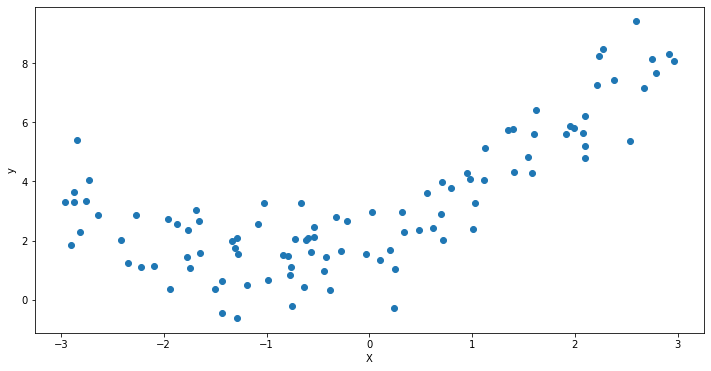

In [16]:
def plotXY(X, y):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

plotXY(X, y)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.19083994])

In [18]:
X_poly[0]

array([-1.19083994,  1.41809977])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00818526]), array([[1.00309194, 0.47379649]]))

In [20]:
preds = lin_reg.predict(X_poly)

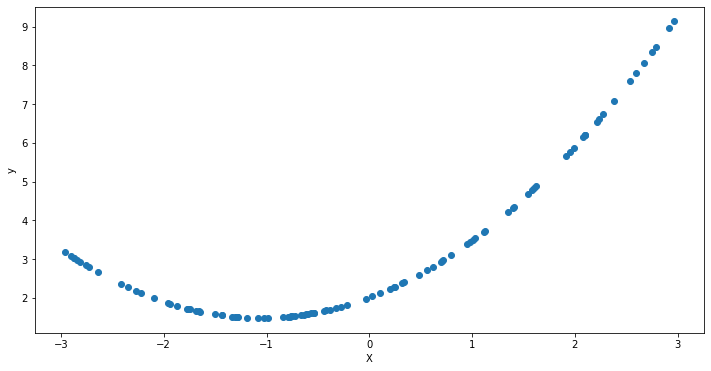

In [21]:
plotXY(X, preds)

* Model estimates 1.7933032 + 1.00287649x + 0.54739245(x^2)
* The original was 2 + x + 0.5(x^2)

Note that when there are multiple features, Polynomial Regression is capable of find‐
ing relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were
two features a and b, PolynomialFeatures with degree=3 would not only add the
features a^2,a^3, b^2, and b^3, but also the combinations ab, a^2b, and ab^2.


# Learning Curves

* Of course, this high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. The model that will generalize
best in this case is the quadratic model. It makes sense since the data was generated
using a quadratic model, but in general you won’t know what function generated the
data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?
* In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.figure(figsize=(12, 6))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth=3, label='test')
    plt.ylim(0, 5)
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

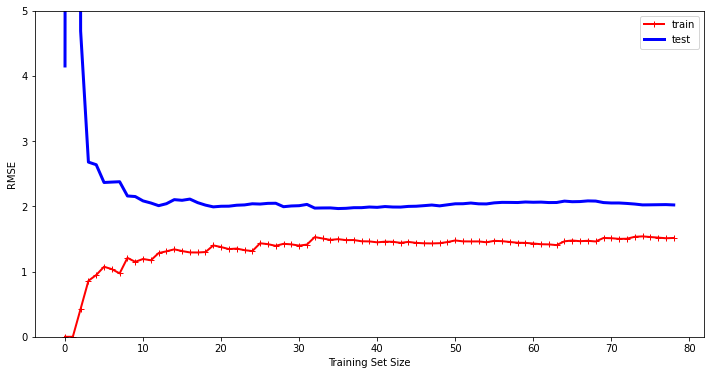

In [23]:
# straight line -> linear regression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

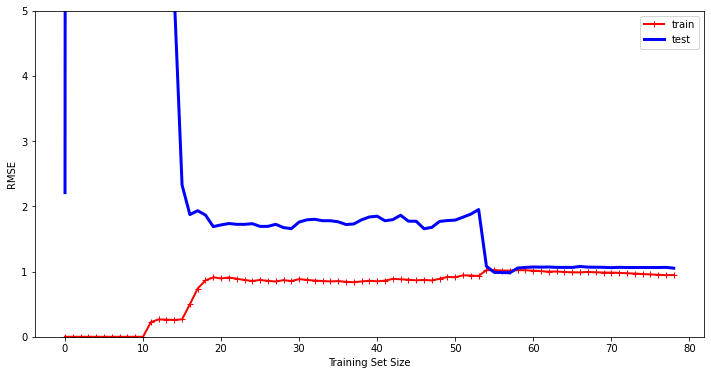

In [24]:
# Now lets see how 10th degree polynomial model is doing on this data
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline(
    [
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression()),
    ]
)

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:
* The error on the training data is much lower than with the Linear Regression model.
* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.
* One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.


## Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [26]:
ridge_reg.predict([[1.5], [3]])

array([[4.78241361],
       [6.2318236 ]])

In [27]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5], [3]])

array([4.75409948, 6.20648798])

## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5], [3]])

array([4.72943267, 6.130246  ])

## Elastic Net

* Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression
* ![ElasticNet Cost Function](etc/elasticNetCostFunction.jpg)

In [29]:
from sklearn.linear_model import ElasticNet
#l1_ratio corresponds to the mix ratio r
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73133754])

## Early Stopping

* A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.
* <img src='etc/earlyStopping.jpg' width='50%' />

In [30]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data

poly_scaler = Pipeline(
    [
        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
        ('std_scaler', StandardScaler())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.fit_transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant',
    eta0=0.0005)

minimum_test_error = float('inf')
best_epoch = None
best_model = None

In [31]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    test_error = mean_squared_error(y_test, y_test_predict)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [32]:
best_epoch, minimum_test_error

(932, 0.8844529992625544)

# Logistic Regression

## Decision Boundries

* Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica
* Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn import datasets
iris = datasets.load_iris()

In [35]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [36]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int32) # 1 if iris-virginica, else 0

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [38]:
# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

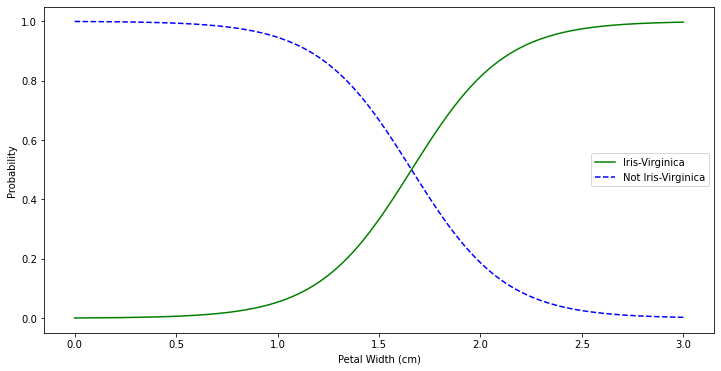

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.

## Softmax Regression

* The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers. This is called Somax Regression, or Multinomial Logistic Regression
* The idea is quite simple: when given an instance x, the Softmax Regression model
first computes a score sk
(x) for each class k, then estimates the probability of each
class by applying the somax function (also called the normalized exponential) to the
scores
* ![](etc/softmaxFormula.jpg)
* Note that each class has its own dedicated parameter vector θ
(k). All these vectors are
typically stored as rows in a parameter matrix Θ.
* The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture
* Another loss function which suitable for Softmax Regression is:
<br>
![](etc/crossEntropyLoss.jpg)

In [42]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [43]:
softmax_reg.predict([[5, 2]])

array([2])

In [44]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
# DONE!